In [18]:
import json
import plotly.plotly as py
import plotly.tools as tls
import gensim
import nltk
import numpy as np
from plotly.graph_objs import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

In [2]:
with open('./train_20170724.json', 'r') as f:
    data = json.load(f)

In [3]:
def select_bot(users):
    user1, user2 = users
    if user1['userType'] == 'Human':
        return user2
    else:
        return user1

def select_human(users):
    user1, user2 = users
    if user1['userType'] == 'Bot':
        return user2
    else:
        return user1

def get_responses(thread, user):
    return [t for t in thread if t['userId'] == user['id']]

In [4]:
human_responses = []
for dialog in data:
    bot = select_bot(dialog['users'])
    human = select_human(dialog['users'])
    context = dialog['context']
    human_responses += get_responses(dialog['thread'], human)

In [7]:
model = gensim.models.Word2Vec.load_word2vec_format('/data/shared/word_vectors/GoogleNews-vectors-negative300.bin', binary=True)

In [9]:
human_tokens = [nltk.word_tokenize(r['text']) for r in human_responses]

In [10]:
mean_vecs = []
for sent_tokens in human_tokens:
    mean_w2v = np.zeros(300)
    for token in sent_tokens:
        if token in model:
            mean_w2v += model[token]
    mean_w2v = mean_w2v / len(sent_tokens)
    mean_vecs.append(mean_w2v)

In [11]:
X_std = StandardScaler().fit_transform(mean_vecs)

In [15]:
sklearn_pca = sklearnPCA(n_components=3, whiten=True)
Y_sklearn = sklearn_pca.fit_transform(X_std)

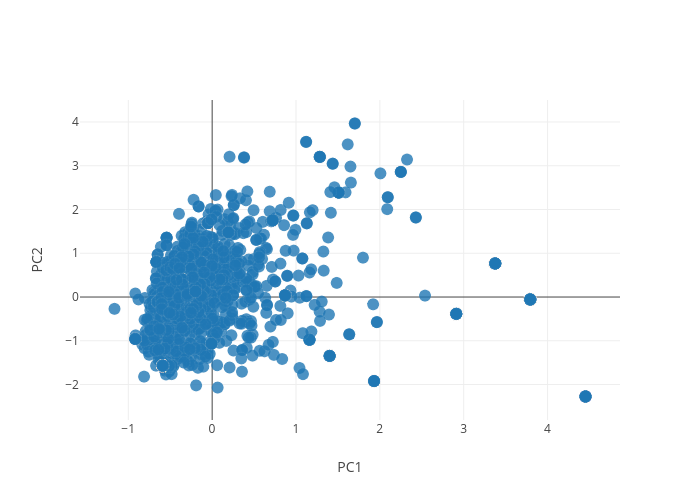

In [17]:
traces = []

trace = Scatter(
    x=Y_sklearn[:, 0],
    y=Y_sklearn[:, 1],
    mode='markers',
    name='test',
    marker=Marker(
        size=12,
        line=Line(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5),
        opacity=0.8))
traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout)
py.image.ishow(fig)